In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

## About the Dataset



You are provided with information on policyholders containing the attributes like policy tenure, age of the car, age of the car owner, population density of the city, make and model of the car, power, engine type, etc and the target variable indicating whether the policyholder files a claim in the next 6 months or not.



## Problem Statement



CarIns is a startup that provides insurance for cars. It is one of the best car insurance brands known for the highest claim settlement ratio. It was launched back in Oct 2020 and acquired its initial policyholders by providing a hassle-free claim process, instant policy issuance, and claim settlements at minimum coverages.


As it's a fast growing startup, the company would like to optimize the cost of the insurance by identifying the policyholders who are more likely to claim in the next 6 months. 

**Now the company would like to use Data Science to identify the policyholders whose chances of filing a claim are high in the next 6 months.** The company challenges the Data Science community to build a high-performance algorithm to predict if the policyholder will file a claim in the next 6 months or not based on the set of car and policy features.

In [2]:
train = pd.read_csv(r"C:\Users\HP\Downloads\Case Study Dataset\train_qWM28Yl.csv")
test =  pd.read_csv(r"C:\Users\HP\Downloads\Case Study Dataset\test_zo1G9sv.csv")
submission = pd.read_csv(r"C:\Users\HP\Downloads\sample_submission_KvRh9Sx.csv")

In [3]:
pd.set_option("display.max_columns",50)
train.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [4]:
test.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID58593,0.341732,0.00,0.586538,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
1,ID58594,0.307241,0.13,0.442308,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197,4,Manual,5,Electric,4.8,3845,1735,1530,1335,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
2,ID58595,0.327924,0.12,0.451923,C8,8794,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2
3,ID58596,0.782654,0.01,0.461538,C5,34738,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
4,ID58597,1.233404,0.02,0.634615,C5,34738,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0


# EDA 

## Univariate Analaysis

In [5]:
# Lets combine the Data

combined = pd.concat([train, test], ignore_index = True)

In [6]:
# Lets check the Deminsion of the Data

print('Shape of the Data:--> ',combined.shape)

Shape of the Data:-->  (97655, 44)


In [7]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97655 entries, 0 to 97654
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         97655 non-null  object 
 1   policy_tenure                     97655 non-null  float64
 2   age_of_car                        97655 non-null  float64
 3   age_of_policyholder               97655 non-null  float64
 4   area_cluster                      97655 non-null  object 
 5   population_density                97655 non-null  int64  
 6   make                              97655 non-null  int64  
 7   segment                           97655 non-null  object 
 8   model                             97655 non-null  object 
 9   fuel_type                         97655 non-null  object 
 10  max_torque                        97655 non-null  object 
 11  max_power                         97655 non-null  object 
 12  engi

In [8]:
num_cols = combined.select_dtypes(include = np.number).columns
cat_cols = combined.select_dtypes(include = 'object').columns

In [9]:
len(num_cols), len(cat_cols)

(16, 28)

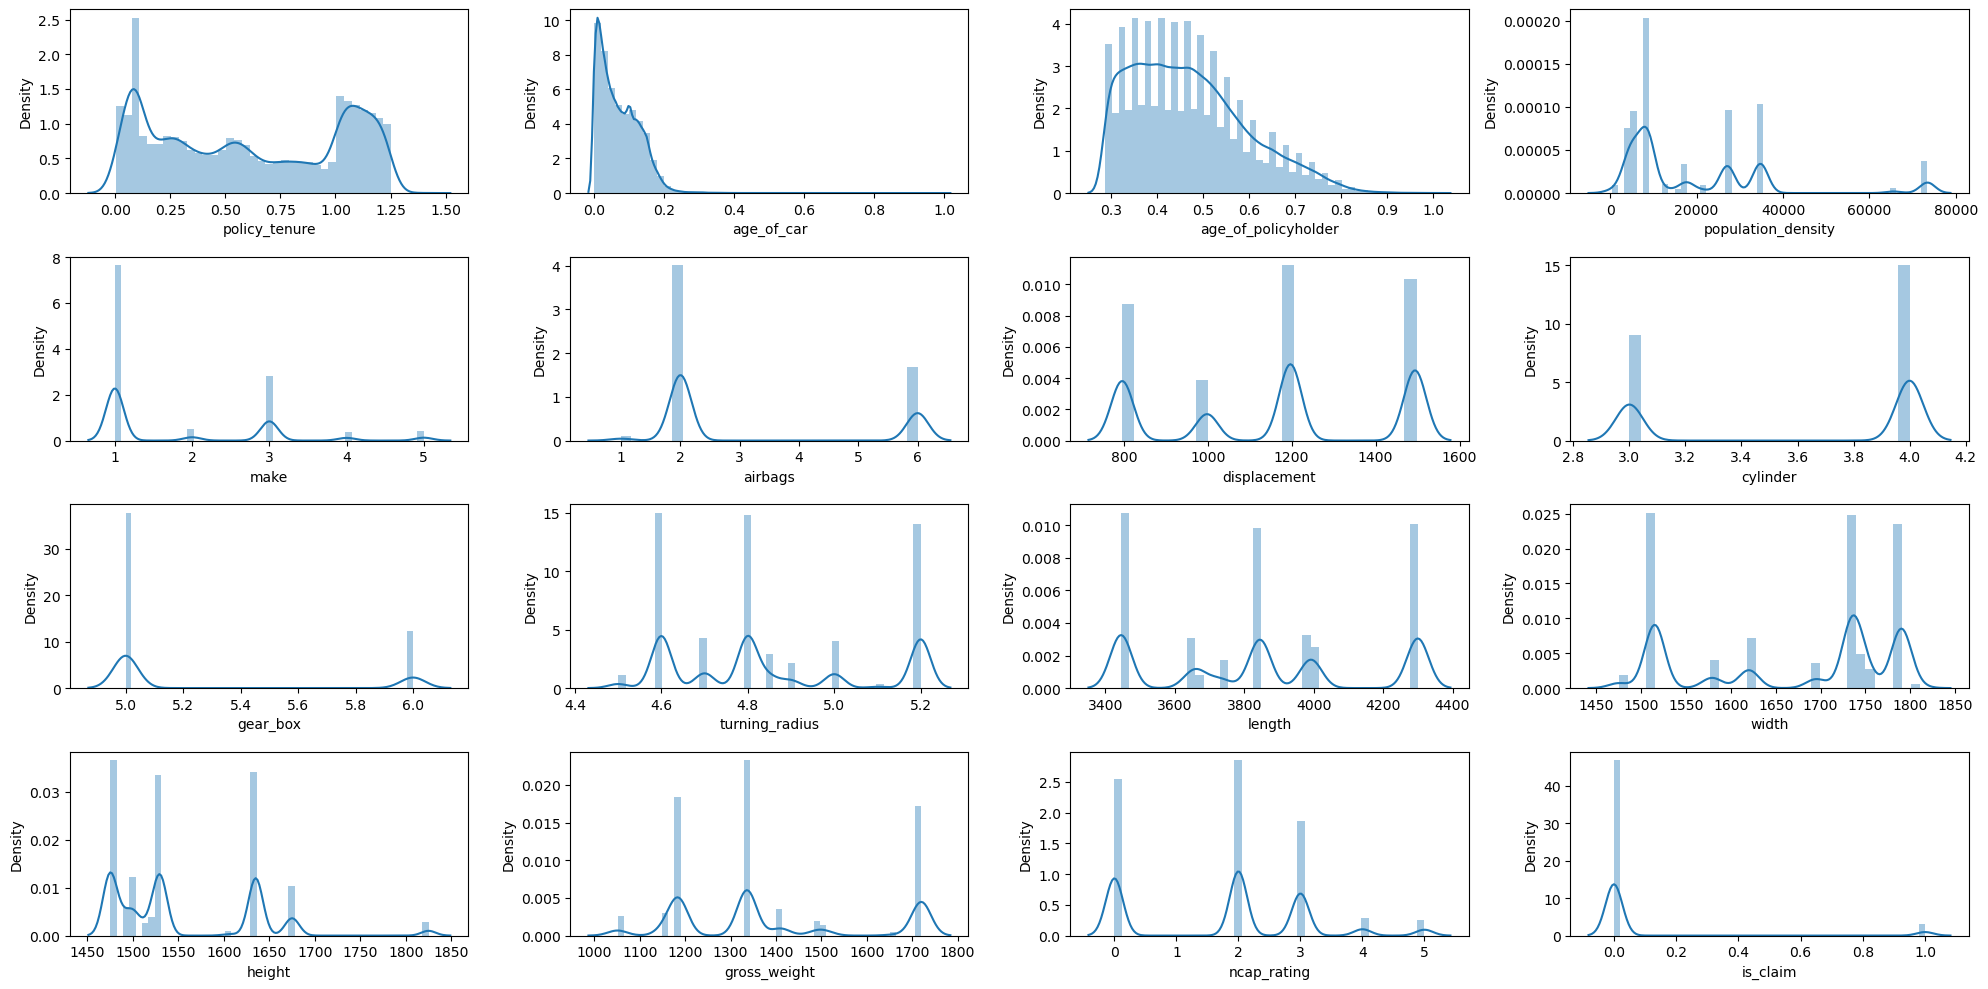

In [10]:
nrows = 4
ncols = 4
repeater = 1

plt.figure(figsize = (20,10))
for i in num_cols:
    plt.subplot(nrows,ncols,repeater)
    sns.distplot(combined.loc[:, i])
    repeater+=1
    
plt.tight_layout()
plt.show()

In [11]:
cat_cols

Index(['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')

In [12]:
cat_vars = ['area_cluster', 'segment', 'model', 'fuel_type','engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert']

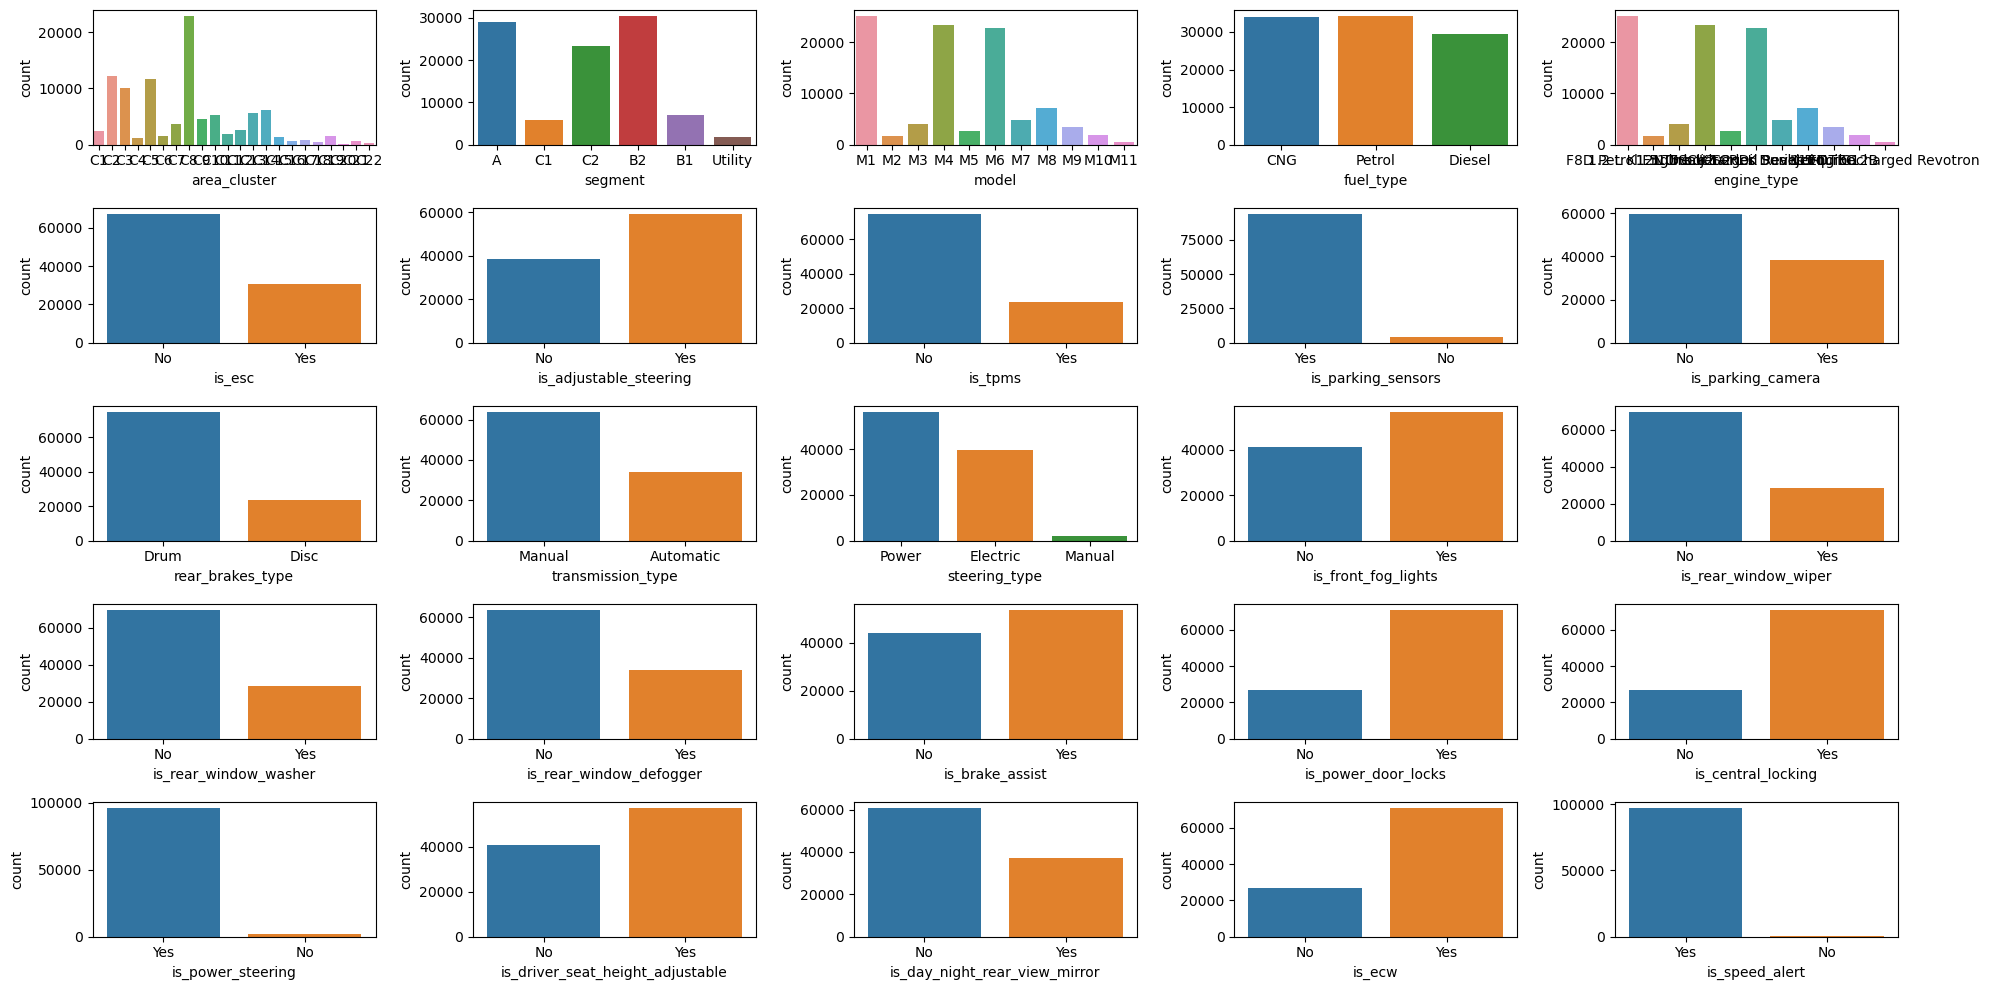

In [13]:
nrows = 5
ncols = 5
repeater = 1

plt.figure(figsize = (20,10))
for i in cat_vars:
    plt.subplot(nrows,ncols,repeater)
    sns.countplot(combined.loc[:, i])
    repeater+=1
    
plt.tight_layout()
plt.show()

## Bivariate Analysis

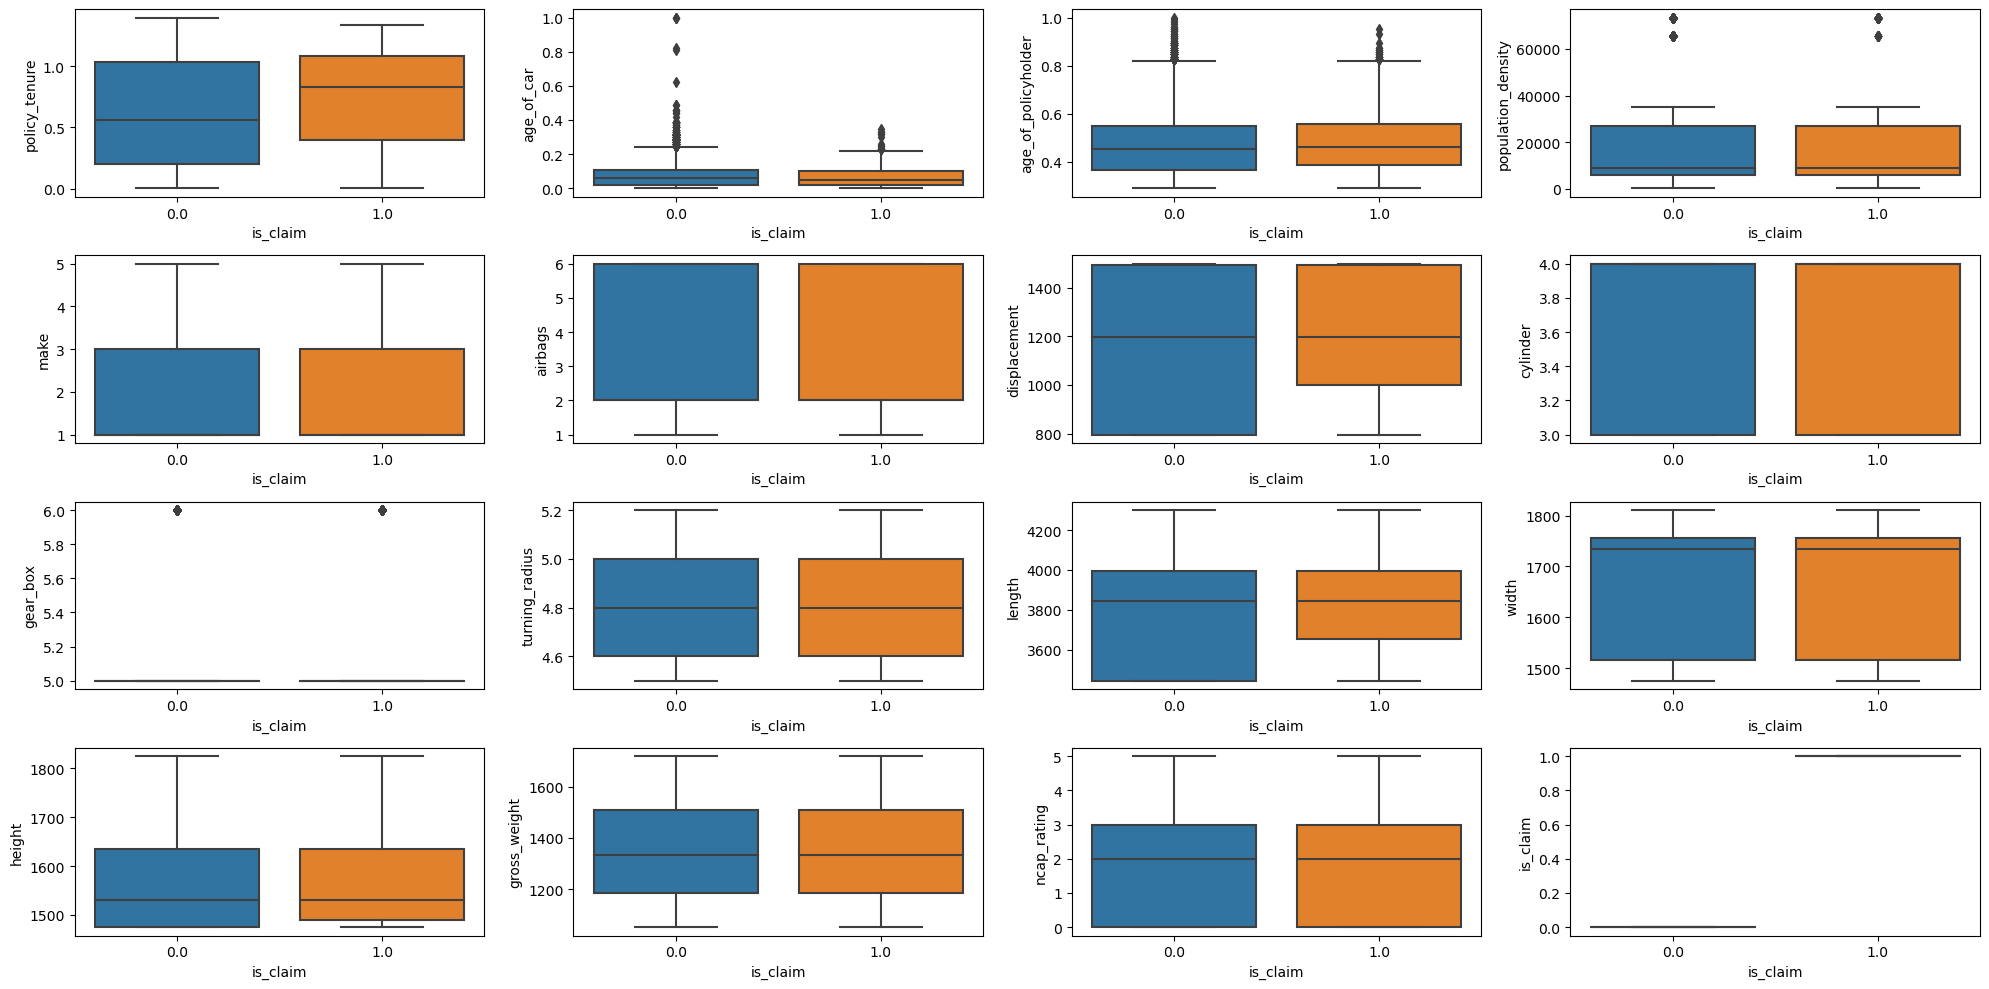

In [14]:
repeater = 1
plt.figure(figsize=(20,10))
for i in num_cols:
    plt.subplot(4,4,repeater)
    sns.boxplot(combined.is_claim,combined.loc[:, i])
    repeater+=1
    
plt.tight_layout()
plt.show()

In [15]:
# Apply the Statistical Test

# Two Sample Independent T test
# Ho: That the Features have no effect on Target or vice versa
# Ha: That the Features have effect on Target or vice versa

imp_feats = []

for i in num_cols:
    zero = combined.loc[combined.is_claim==0, i]
    one = combined.loc[combined.is_claim==1, i]
    teststats, pvalue = stats.ttest_ind(zero,one,alternative='two-sided')
    
    if pvalue<0.05:
        imp_feats.append(i)
        
print(imp_feats)

['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'cylinder', 'width', 'is_claim']


In [16]:
len(num_cols)

16

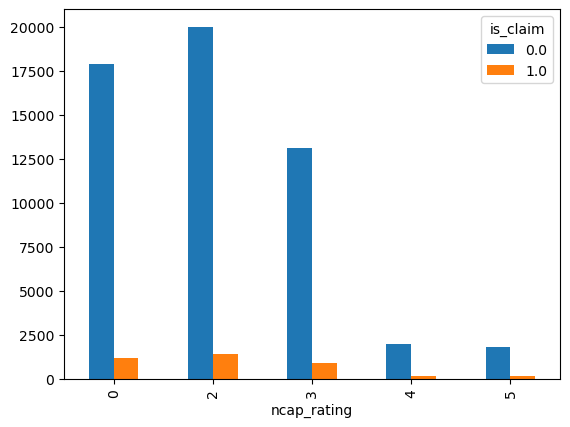

In [17]:
# Ncap rating vs Target
pd.crosstab(combined.ncap_rating, combined.is_claim).plot(kind='bar')
plt.show()

# We can infer that the cars that have the lowest ncap rating are 
# more prone to the Claims.....

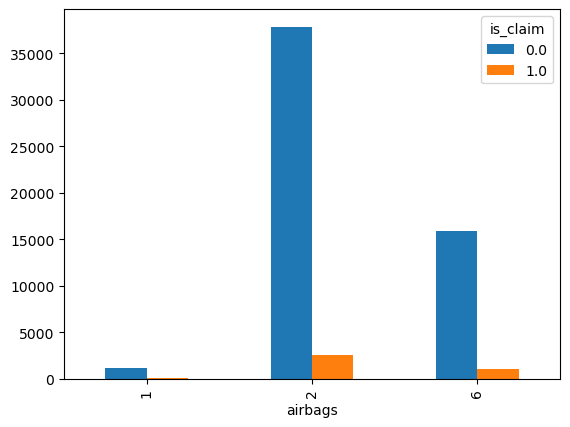

In [18]:
# airbags vs target

pd.crosstab(combined.airbags, combined.is_claim).plot(kind='bar')
plt.show()

In [19]:
# Cat vr target 

cat_feats = []

for i in cat_vars:
    tbl = pd.crosstab(train.loc[:, i], train.is_claim)
    teststats, pvalue, dof, exp_freq = stats.chi2_contingency(tbl)
    if pvalue<0.05:
        cat_feats.append(i)
        
print(cat_feats)

['area_cluster', 'segment', 'model', 'engine_type', 'is_adjustable_steering', 'is_parking_sensors', 'is_front_fog_lights', 'is_brake_assist', 'is_driver_seat_height_adjustable']


## Feature Engineering

In [20]:
combined.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0


In [21]:
# Max torque

combined[['Nm_torque','rpm_torque']]= combined.max_torque.str.split("@", expand=True)

In [22]:
# Max power

combined[['hp','rpm_power']]= combined.max_power.str.split("@", expand=True)

In [23]:
combined.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Nm_torque,rpm_torque,hp,rpm_power
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0,60Nm,3500rpm,40.36bhp,6000rpm
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0,60Nm,3500rpm,40.36bhp,6000rpm


In [24]:
combined['rpm_torque']=combined.rpm_torque.apply(lambda x:float(x[:-3]))
combined['rpm_power']=combined.rpm_power.apply(lambda x:float(x[:-3]))
combined['hp']=combined.hp.apply(lambda x:float(x[:-3]))
combined['Nm_torque']=combined.Nm_torque.apply(lambda x:float(x[:-2]))

In [25]:
for i in cat_vars:
    if i.startswith("is") & (i!='is_claim'):
        mapp = {'Yes':1,'No':0}
        combined[i] = combined[i].map(mapp)

In [26]:
combined.isnull().sum()[combined.isnull().sum()!=0]

is_claim    39063
dtype: int64

In [27]:
combined.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Nm_torque,rpm_torque,hp,rpm_power
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0


In [28]:
# Per unit torque..
combined["per_unit_torque"]= combined.rpm_torque/combined.Nm_torque
combined["per_unit_power"]= combined.rpm_power/combined.hp

In [29]:
combined['age_prop'] = combined.age_of_car/combined.age_of_policyholder

In [30]:
combined.age_prop

0        0.077612
1        0.053333
2        0.052000
3        0.254222
4        0.173333
           ...   
97650    0.202597
97651    0.098113
97652    0.337297
97653    0.124179
97654    0.390000
Name: age_prop, Length: 97655, dtype: float64

In [31]:
# Count of policy_id using area_cluster....
combined['magic1'] = combined.groupby('area_cluster')['policy_id'].transform('nunique')

In [32]:
zero = combined.loc[combined.is_claim==0, 'magic1']
one = combined.loc[combined.is_claim==1, 'magic1']

stats.ttest_ind(zero, one)

Ttest_indResult(statistic=-4.251501393229285, pvalue=2.1267052931968336e-05)

In [33]:
# Count of policies in Magic1/Pop Density

combined['magic2'] = combined.magic1/combined.population_density

In [34]:
zero = combined.loc[combined.is_claim==0, 'magic2']
one = combined.loc[combined.is_claim==1, 'magic2']

stats.ttest_ind(zero, one)

Ttest_indResult(statistic=-3.7411060267064706, pvalue=0.00018338678692374335)

In [35]:
#combined['magic3'] = combined.groupby('policy_id')['policy_tenure'].transform('min')
#combined['magic4'] = combined.groupby('policy_id')['policy_tenure'].transform('max')
#combined['magic5'] = combined.groupby('policy_id')['policy_tenure'].transform('mean')
#combined['magic6'] = combined.groupby('policy_id')['policy_tenure'].transform('median')

In [36]:
# Finding the Summary Statistics of Policy Tenure using area_cluster
combined['magic3'] = combined.groupby('area_cluster')['policy_tenure'].transform('min')
combined['magic4'] = combined.groupby('area_cluster')['policy_tenure'].transform('max')
combined['magic5'] = combined.groupby('area_cluster')['policy_tenure'].transform('mean')
combined['magic6'] = combined.groupby('area_cluster')['policy_tenure'].transform('median')

In [37]:
combined.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,Nm_torque,rpm_torque,hp,rpm_power,per_unit_torque,per_unit_power,age_prop,magic1,magic2,magic3,magic4,magic5,magic6
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,...,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.077612,2473,0.495591,0.002838,1.342422,0.471300,0.396802
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,...,0,0,0,0,0,1,0,0,0,1,0,0.0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.053333,12158,0.450246,0.002739,1.370463,0.609815,0.572343


In [38]:
list_feats = ['magic3', 'magic4', 'magic5', 'magic6']

for i in list_feats:
    zero = combined.loc[combined.is_claim==0,i]
    one = combined.loc[combined.is_claim==1,i]
    teststats, pvalue = stats.ttest_ind(zero, one)
    print("Pvalue: ", i, pvalue)

Pvalue:  magic3 0.01517380140799255
Pvalue:  magic4 0.1896759377985605
Pvalue:  magic5 2.5550496912611606e-07
Pvalue:  magic6 2.4634736641066477e-07


In [39]:
# area, segment, model, fuel_type, engine..rear brakes...transmission 
# steering 

combined.engine_type.unique()

array(['F8D Petrol Engine', '1.2 L K12N Dualjet', '1.0 SCe',
       '1.5 L U2 CRDi', '1.5 Turbocharged Revotorq', 'K Series Dual jet',
       '1.2 L K Series Engine', 'K10C', 'i-DTEC', 'G12B',
       '1.5 Turbocharged Revotron'], dtype=object)

In [40]:
tbl = pd.crosstab(combined.is_claim, combined.engine_type)

teststats, pvalue, df, exp_freq = stats.chi2_contingency(tbl)
print(pvalue)

0.029490222196639326


In [41]:
combined.transmission_type.unique()

array(['Manual', 'Automatic'], dtype=object)

In [42]:
combined['transmission_type'] = np.where(combined.transmission_type=='Manual', 1, 0)

<AxesSubplot:xlabel='rear_brakes_type'>

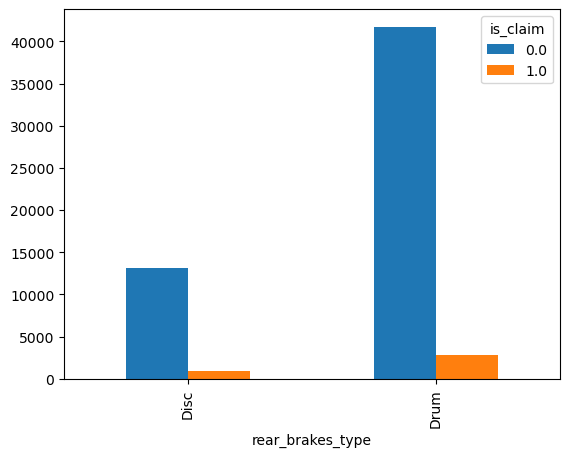

In [43]:
pd.crosstab(combined.rear_brakes_type, combined.is_claim).plot(kind='bar')

In [44]:
# Drum = 1 and Disk = 0
combined['rear_brakes_type'] = np.where(combined.rear_brakes_type=='Drum', 1, 0)

In [45]:
combined.steering_type.value_counts(normalize=True)

Power       0.573826
Electric    0.406369
Manual      0.019804
Name: steering_type, dtype: float64

In [46]:
combined.drop(['policy_id', 'max_torque', 'max_power', 'magic4'], axis = 1,inplace = True)

In [47]:
## Split the Data into Train and Test
newtrain = combined.loc[0:train.shape[0]-1, ]
newtest = combined.loc[train.shape[0]:, ]

In [48]:
train.shape, newtrain.shape,newtest.shape, test.shape

((58592, 44), (58592, 53), (39063, 53), (39063, 43))

In [49]:
# Drop the TArget variable from train and test
X = newtrain.drop('is_claim', axis=1)
newtest = newtest.drop('is_claim', axis=1)
y = newtrain.is_claim

In [50]:
mycols = ['area_cluster', 'steering_type', 'engine_type', 'model', 'fuel_type', 'segment']

import category_encoders as ce

tgt = ce.TargetEncoder(cols=mycols)

newx = tgt.fit_transform(X, y)
test_encoded = tgt.transform(newtest)

In [51]:
newx.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,...,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,Nm_torque,rpm_torque,hp,rpm_power,per_unit_torque,per_unit_power,age_prop,magic1,magic2,magic3,magic5,magic6
0,0.515874,0.05,0.644231,0.051771,4990,1,0.060389,0.061413,0.060748,0.061413,2,0,0,0,1,0,1,796,3,1,5,0.062026,4.6,3445,1515,...,0,0,0,0,0,0,0,1,0,0,0,1,0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.077612,2473,0.495591,0.002838,0.471300,0.396802
1,0.672619,0.02,0.375000,0.070825,27003,1,0.060389,0.061413,0.060748,0.061413,2,0,0,0,1,0,1,796,3,1,5,0.062026,4.6,3445,1515,...,0,0,0,0,0,0,0,1,0,0,0,1,0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.053333,12158,0.450246,0.002739,0.609815,0.572343
2,0.841110,0.02,0.384615,0.070972,4076,1,0.060389,0.061413,0.060748,0.061413,2,0,0,0,1,0,1,796,3,1,5,0.062026,4.6,3445,1515,...,0,0,0,0,0,0,0,1,0,0,0,1,0,60.0,3500.0,40.36,6000.0,58.333333,148.662042,0.052000,10172,2.495584,0.002753,0.493563,0.436682
3,0.900277,0.11,0.432692,0.076692,21622,1,0.064099,0.074074,0.066384,0.074074,2,1,1,0,1,1,1,1197,4,0,5,0.066873,4.8,3995,1735,...,1,0,0,1,1,1,1,1,1,1,1,1,2,113.0,4400.0,88.50,6000.0,38.938053,67.796610,0.254222,1112,0.051429,0.002773,0.509921,0.457736
4,0.596403,0.11,0.634615,0.057745,34738,2,0.060389,0.053940,0.066384,0.053940,2,0,0,0,0,1,1,999,3,0,5,0.066873,5.0,3731,1579,...,0,0,0,0,0,1,1,1,0,1,1,1,2,91.0,4250.0,67.06,5500.0,46.703297,82.016105,0.173333,11683,0.336318,0.002768,0.520588,0.487713


In [52]:
# Create unit_weight 
newx['per_unit_vol'] = newx.gross_weight/(newx.length*newx.width*newx.height)
test_encoded['per_unit_vol'] = test_encoded.gross_weight/(test_encoded.length*test_encoded.width*test_encoded.height)

In [53]:
# Scaled the Data 

scale = ['policy_tenure', 'population_density', 'displacement', 'length', 'width', 'height', 'gross_weight', 'Nm_torque',
        'rpm_torque', 'hp', 'rpm_power', 'per_unit_torque', 'per_unit_power','magic1', 'magic3', 'magic5', 'magic6']

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

for i in scale:
    newx.loc[:, i] = sc.fit_transform(pd.DataFrame(newx.loc[:, i]))
    test_encoded.loc[:, i] = sc.fit_transform(pd.DataFrame(test_encoded.loc[:, i]))

## Building the Machine Learning Models

### Random Forest Model

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion = 'entropy')

pred = rf.fit(newx, y).predict(test_encoded)

In [55]:
submission['is_claim'] = pred

In [56]:
submission.to_csv("MyFirstModel.csv", index = False)

In [57]:
cd

C:\Users\HP


### MyFirstModel

**Your private score for this submission is : 0.033096926713948,** 

In [58]:
# Apply Smote
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [59]:
# Resample the Data using smote 
smotex, smotey = smote.fit_resample(newx, y)

In [60]:
rf = RandomForestClassifier(criterion = 'entropy')
pred_smote = rf.fit(smotex, smotey).predict(test_encoded)

In [61]:
submission['is_claim'] = pred_smote
submission.to_csv("SecondModel.csv", index = False)

In [62]:
cd

C:\Users\HP


### SecondModel

**Your private score for this submission is : 0.1115224433132809,**



In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [64]:
# Define the base Models 

def base_models():
    models = dict()
    models['lg'] = LogisticRegression()
    models['rf'] = RandomForestClassifier(criterion='entropy')
    models['ada'] = AdaBoostClassifier()
    models['gbm'] = GradientBoostingClassifier()
    models['xgb'] = XGBClassifier()
    models['lgbm'] = LGBMClassifier()
    models['catboost'] = CatBoostClassifier()
    models['naivebayes'] = GaussianNB()
    
    return models

In [65]:
# Evaluation Function

from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score,StratifiedKFold

def eval_score(model):
    cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
    score = cross_val_score(model,smotex,smotey,
                            scoring='f1',cv=cv,error_score='raise',
                            n_jobs=-1)
    
    return score

In [66]:
# Build the Models....
models = base_models()

result, names = list(), list()
for name, model in models.items():
    finalscore = eval_score(model)
    result.append(finalscore)
    names.append(name)
    print('%s %.3f (%.3f)'% (name, np.mean(result), np.std(result)))

lg 0.587 (0.003)
rf 0.748 (0.160)
ada 0.738 (0.131)
gbm 0.776 (0.131)
xgb 0.813 (0.139)
lgbm 0.836 (0.137)
catboost 0.854 (0.134)
naivebayes 0.822 (0.151)


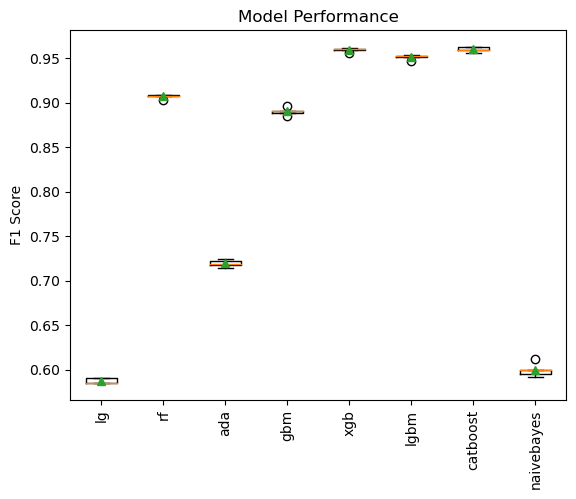

In [67]:
plt.boxplot(result,labels= names , showmeans= True)
plt.xticks(rotation=90)
plt.ylabel("F1 Score")
plt.title("Model Performance")
plt.show()

In [68]:
## STACKING
## FINAL MODELS - XGB , LGBM , CATBOOST

base=[('xgb',XGBClassifier()),
      ('lgbm',LGBMClassifier())]

mycv= StratifiedKFold(n_splits= 5, shuffle= True, random_state= 42)

from sklearn.ensemble import StackingClassifier

stack = StackingClassifier(estimators=base, final_estimator=CatBoostClassifier(),
                           cv=mycv)

In [69]:
pred_stack = stack.fit(smotex, smotey).predict(test_encoded)

Learning rate set to 0.076574
0:	learn: 0.5264877	total: 155ms	remaining: 2m 34s
1:	learn: 0.4094319	total: 171ms	remaining: 1m 25s
2:	learn: 0.3409525	total: 186ms	remaining: 1m 1s
3:	learn: 0.2910757	total: 204ms	remaining: 50.7s
4:	learn: 0.2527729	total: 224ms	remaining: 44.6s
5:	learn: 0.2252875	total: 244ms	remaining: 40.4s
6:	learn: 0.2064723	total: 260ms	remaining: 36.9s
7:	learn: 0.1921696	total: 276ms	remaining: 34.2s
8:	learn: 0.1810148	total: 291ms	remaining: 32.1s
9:	learn: 0.1708587	total: 308ms	remaining: 30.5s
10:	learn: 0.1631126	total: 325ms	remaining: 29.2s
11:	learn: 0.1572191	total: 339ms	remaining: 27.9s
12:	learn: 0.1529222	total: 354ms	remaining: 26.9s
13:	learn: 0.1490179	total: 369ms	remaining: 26s
14:	learn: 0.1456893	total: 384ms	remaining: 25.2s
15:	learn: 0.1427573	total: 399ms	remaining: 24.5s
16:	learn: 0.1404040	total: 415ms	remaining: 24s
17:	learn: 0.1388370	total: 430ms	remaining: 23.4s
18:	learn: 0.1373038	total: 446ms	remaining: 23s
19:	learn: 0.13

168:	learn: 0.1270579	total: 2.47s	remaining: 12.1s
169:	learn: 0.1270446	total: 2.48s	remaining: 12.1s
170:	learn: 0.1270333	total: 2.5s	remaining: 12.1s
171:	learn: 0.1270208	total: 2.51s	remaining: 12.1s
172:	learn: 0.1270071	total: 2.53s	remaining: 12.1s
173:	learn: 0.1269970	total: 2.54s	remaining: 12.1s
174:	learn: 0.1269808	total: 2.56s	remaining: 12s
175:	learn: 0.1269641	total: 2.57s	remaining: 12s
176:	learn: 0.1269521	total: 2.58s	remaining: 12s
177:	learn: 0.1269522	total: 2.59s	remaining: 12s
178:	learn: 0.1269428	total: 2.61s	remaining: 12s
179:	learn: 0.1269309	total: 2.62s	remaining: 11.9s
180:	learn: 0.1269308	total: 2.63s	remaining: 11.9s
181:	learn: 0.1269147	total: 2.65s	remaining: 11.9s
182:	learn: 0.1269012	total: 2.66s	remaining: 11.9s
183:	learn: 0.1268835	total: 2.67s	remaining: 11.9s
184:	learn: 0.1268750	total: 2.69s	remaining: 11.9s
185:	learn: 0.1268606	total: 2.71s	remaining: 11.8s
186:	learn: 0.1268554	total: 2.72s	remaining: 11.8s
187:	learn: 0.1268375	t

327:	learn: 0.1254117	total: 4.73s	remaining: 9.69s
328:	learn: 0.1254100	total: 4.74s	remaining: 9.68s
329:	learn: 0.1254006	total: 4.77s	remaining: 9.68s
330:	learn: 0.1253973	total: 4.78s	remaining: 9.67s
331:	learn: 0.1253890	total: 4.8s	remaining: 9.66s
332:	learn: 0.1253806	total: 4.81s	remaining: 9.64s
333:	learn: 0.1253790	total: 4.83s	remaining: 9.62s
334:	learn: 0.1253578	total: 4.84s	remaining: 9.61s
335:	learn: 0.1253564	total: 4.85s	remaining: 9.59s
336:	learn: 0.1253460	total: 4.87s	remaining: 9.58s
337:	learn: 0.1253314	total: 4.88s	remaining: 9.56s
338:	learn: 0.1253189	total: 4.9s	remaining: 9.55s
339:	learn: 0.1253100	total: 4.91s	remaining: 9.53s
340:	learn: 0.1253058	total: 4.92s	remaining: 9.51s
341:	learn: 0.1252963	total: 4.94s	remaining: 9.5s
342:	learn: 0.1252860	total: 4.95s	remaining: 9.48s
343:	learn: 0.1252777	total: 4.96s	remaining: 9.47s
344:	learn: 0.1252738	total: 4.98s	remaining: 9.45s
345:	learn: 0.1252580	total: 4.99s	remaining: 9.43s
346:	learn: 0.1

496:	learn: 0.1241755	total: 7.05s	remaining: 7.14s
497:	learn: 0.1241755	total: 7.07s	remaining: 7.12s
498:	learn: 0.1241755	total: 7.08s	remaining: 7.11s
499:	learn: 0.1241690	total: 7.09s	remaining: 7.09s
500:	learn: 0.1241656	total: 7.11s	remaining: 7.08s
501:	learn: 0.1241656	total: 7.12s	remaining: 7.06s
502:	learn: 0.1241569	total: 7.13s	remaining: 7.05s
503:	learn: 0.1241466	total: 7.15s	remaining: 7.03s
504:	learn: 0.1241384	total: 7.16s	remaining: 7.02s
505:	learn: 0.1241348	total: 7.17s	remaining: 7s
506:	learn: 0.1241235	total: 7.19s	remaining: 6.99s
507:	learn: 0.1241160	total: 7.2s	remaining: 6.98s
508:	learn: 0.1241160	total: 7.22s	remaining: 6.96s
509:	learn: 0.1241087	total: 7.23s	remaining: 6.95s
510:	learn: 0.1241088	total: 7.25s	remaining: 6.93s
511:	learn: 0.1241018	total: 7.26s	remaining: 6.92s
512:	learn: 0.1240941	total: 7.28s	remaining: 6.91s
513:	learn: 0.1240940	total: 7.29s	remaining: 6.89s
514:	learn: 0.1240941	total: 7.3s	remaining: 6.88s
515:	learn: 0.124

670:	learn: 0.1235025	total: 9.29s	remaining: 4.55s
671:	learn: 0.1234894	total: 9.3s	remaining: 4.54s
672:	learn: 0.1234787	total: 9.32s	remaining: 4.53s
673:	learn: 0.1234674	total: 9.33s	remaining: 4.51s
674:	learn: 0.1234586	total: 9.34s	remaining: 4.5s
675:	learn: 0.1234558	total: 9.36s	remaining: 4.48s
676:	learn: 0.1234558	total: 9.37s	remaining: 4.47s
677:	learn: 0.1234537	total: 9.38s	remaining: 4.46s
678:	learn: 0.1234501	total: 9.4s	remaining: 4.44s
679:	learn: 0.1234431	total: 9.41s	remaining: 4.43s
680:	learn: 0.1234431	total: 9.42s	remaining: 4.41s
681:	learn: 0.1234369	total: 9.44s	remaining: 4.4s
682:	learn: 0.1234368	total: 9.45s	remaining: 4.38s
683:	learn: 0.1234368	total: 9.46s	remaining: 4.37s
684:	learn: 0.1234331	total: 9.47s	remaining: 4.36s
685:	learn: 0.1234331	total: 9.48s	remaining: 4.34s
686:	learn: 0.1234331	total: 9.49s	remaining: 4.33s
687:	learn: 0.1234278	total: 9.51s	remaining: 4.31s
688:	learn: 0.1234263	total: 9.52s	remaining: 4.3s
689:	learn: 0.123

841:	learn: 0.1228794	total: 11.4s	remaining: 2.14s
842:	learn: 0.1228724	total: 11.4s	remaining: 2.13s
843:	learn: 0.1228724	total: 11.4s	remaining: 2.11s
844:	learn: 0.1228723	total: 11.4s	remaining: 2.1s
845:	learn: 0.1228724	total: 11.4s	remaining: 2.08s
846:	learn: 0.1228725	total: 11.5s	remaining: 2.07s
847:	learn: 0.1228723	total: 11.5s	remaining: 2.06s
848:	learn: 0.1228608	total: 11.5s	remaining: 2.04s
849:	learn: 0.1228522	total: 11.5s	remaining: 2.03s
850:	learn: 0.1228522	total: 11.5s	remaining: 2.01s
851:	learn: 0.1228522	total: 11.5s	remaining: 2s
852:	learn: 0.1228488	total: 11.5s	remaining: 1.99s
853:	learn: 0.1228433	total: 11.5s	remaining: 1.97s
854:	learn: 0.1228432	total: 11.6s	remaining: 1.96s
855:	learn: 0.1228423	total: 11.6s	remaining: 1.95s
856:	learn: 0.1228336	total: 11.6s	remaining: 1.93s
857:	learn: 0.1228247	total: 11.6s	remaining: 1.92s
858:	learn: 0.1228180	total: 11.6s	remaining: 1.91s
859:	learn: 0.1228115	total: 11.6s	remaining: 1.89s
860:	learn: 0.12

In [70]:
submission['is_claim'] = pred_stack
submission.to_csv('FinalStackingModel.csv',index=False)

## FinalStackingModel


**Your private score for this submission is : 0.0231990231990232**

In [71]:
cd

C:\Users\HP


In [72]:
# Direct CatBoost Model 

cboost = CatBoostClassifier(scale_pos_weight=10)
pred_catboost = cboost.fit(smotex, smotey).predict(test_encoded)

Learning rate set to 0.076574
0:	learn: 0.6238709	total: 27.4ms	remaining: 27.4s
1:	learn: 0.5661819	total: 52.4ms	remaining: 26.1s
2:	learn: 0.5202265	total: 77.5ms	remaining: 25.8s
3:	learn: 0.4824824	total: 100ms	remaining: 25s
4:	learn: 0.4514369	total: 123ms	remaining: 24.5s
5:	learn: 0.4252265	total: 143ms	remaining: 23.7s
6:	learn: 0.4011200	total: 167ms	remaining: 23.6s
7:	learn: 0.3839383	total: 190ms	remaining: 23.6s
8:	learn: 0.3680682	total: 214ms	remaining: 23.6s
9:	learn: 0.3563832	total: 235ms	remaining: 23.3s
10:	learn: 0.3448126	total: 257ms	remaining: 23.1s
11:	learn: 0.3358871	total: 279ms	remaining: 23s
12:	learn: 0.3279608	total: 298ms	remaining: 22.6s
13:	learn: 0.3205054	total: 318ms	remaining: 22.4s
14:	learn: 0.3150532	total: 338ms	remaining: 22.2s
15:	learn: 0.3101220	total: 358ms	remaining: 22s
16:	learn: 0.3033646	total: 377ms	remaining: 21.8s
17:	learn: 0.3005469	total: 399ms	remaining: 21.8s
18:	learn: 0.2978612	total: 424ms	remaining: 21.9s
19:	learn: 0.2

163:	learn: 0.1745062	total: 3.63s	remaining: 18.5s
164:	learn: 0.1739541	total: 3.65s	remaining: 18.5s
165:	learn: 0.1737751	total: 3.67s	remaining: 18.4s
166:	learn: 0.1735512	total: 3.69s	remaining: 18.4s
167:	learn: 0.1733944	total: 3.71s	remaining: 18.4s
168:	learn: 0.1725595	total: 3.73s	remaining: 18.3s
169:	learn: 0.1721879	total: 3.75s	remaining: 18.3s
170:	learn: 0.1719866	total: 3.77s	remaining: 18.3s
171:	learn: 0.1702552	total: 3.8s	remaining: 18.3s
172:	learn: 0.1683315	total: 3.82s	remaining: 18.3s
173:	learn: 0.1674919	total: 3.85s	remaining: 18.3s
174:	learn: 0.1673262	total: 3.87s	remaining: 18.2s
175:	learn: 0.1665559	total: 3.89s	remaining: 18.2s
176:	learn: 0.1664510	total: 3.91s	remaining: 18.2s
177:	learn: 0.1657404	total: 3.94s	remaining: 18.2s
178:	learn: 0.1655239	total: 3.96s	remaining: 18.2s
179:	learn: 0.1652348	total: 3.98s	remaining: 18.1s
180:	learn: 0.1645224	total: 4s	remaining: 18.1s
181:	learn: 0.1642866	total: 4.02s	remaining: 18.1s
182:	learn: 0.16

325:	learn: 0.1297076	total: 7.08s	remaining: 14.6s
326:	learn: 0.1296318	total: 7.1s	remaining: 14.6s
327:	learn: 0.1295504	total: 7.12s	remaining: 14.6s
328:	learn: 0.1294923	total: 7.14s	remaining: 14.6s
329:	learn: 0.1292349	total: 7.16s	remaining: 14.5s
330:	learn: 0.1283928	total: 7.18s	remaining: 14.5s
331:	learn: 0.1281250	total: 7.21s	remaining: 14.5s
332:	learn: 0.1280379	total: 7.23s	remaining: 14.5s
333:	learn: 0.1277920	total: 7.25s	remaining: 14.5s
334:	learn: 0.1277117	total: 7.27s	remaining: 14.4s
335:	learn: 0.1276357	total: 7.3s	remaining: 14.4s
336:	learn: 0.1274416	total: 7.33s	remaining: 14.4s
337:	learn: 0.1273793	total: 7.35s	remaining: 14.4s
338:	learn: 0.1271413	total: 7.38s	remaining: 14.4s
339:	learn: 0.1270689	total: 7.4s	remaining: 14.4s
340:	learn: 0.1268693	total: 7.42s	remaining: 14.3s
341:	learn: 0.1266003	total: 7.45s	remaining: 14.3s
342:	learn: 0.1265429	total: 7.47s	remaining: 14.3s
343:	learn: 0.1264788	total: 7.49s	remaining: 14.3s
344:	learn: 0.1

485:	learn: 0.1147061	total: 10.2s	remaining: 10.8s
486:	learn: 0.1146321	total: 10.3s	remaining: 10.8s
487:	learn: 0.1145591	total: 10.3s	remaining: 10.8s
488:	learn: 0.1145317	total: 10.3s	remaining: 10.8s
489:	learn: 0.1145016	total: 10.3s	remaining: 10.7s
490:	learn: 0.1143583	total: 10.3s	remaining: 10.7s
491:	learn: 0.1142959	total: 10.4s	remaining: 10.7s
492:	learn: 0.1142232	total: 10.4s	remaining: 10.7s
493:	learn: 0.1141649	total: 10.4s	remaining: 10.7s
494:	learn: 0.1140493	total: 10.4s	remaining: 10.6s
495:	learn: 0.1140122	total: 10.4s	remaining: 10.6s
496:	learn: 0.1139525	total: 10.5s	remaining: 10.6s
497:	learn: 0.1138878	total: 10.5s	remaining: 10.6s
498:	learn: 0.1138580	total: 10.5s	remaining: 10.5s
499:	learn: 0.1138108	total: 10.5s	remaining: 10.5s
500:	learn: 0.1137790	total: 10.5s	remaining: 10.5s
501:	learn: 0.1137261	total: 10.5s	remaining: 10.5s
502:	learn: 0.1136702	total: 10.6s	remaining: 10.4s
503:	learn: 0.1136358	total: 10.6s	remaining: 10.4s
504:	learn: 

655:	learn: 0.1060003	total: 13.3s	remaining: 6.95s
656:	learn: 0.1059540	total: 13.3s	remaining: 6.93s
657:	learn: 0.1059322	total: 13.3s	remaining: 6.91s
658:	learn: 0.1058983	total: 13.3s	remaining: 6.88s
659:	learn: 0.1058604	total: 13.3s	remaining: 6.86s
660:	learn: 0.1058183	total: 13.3s	remaining: 6.84s
661:	learn: 0.1057885	total: 13.4s	remaining: 6.82s
662:	learn: 0.1057266	total: 13.4s	remaining: 6.8s
663:	learn: 0.1056979	total: 13.4s	remaining: 6.78s
664:	learn: 0.1055735	total: 13.4s	remaining: 6.76s
665:	learn: 0.1055523	total: 13.4s	remaining: 6.73s
666:	learn: 0.1055234	total: 13.4s	remaining: 6.71s
667:	learn: 0.1055023	total: 13.5s	remaining: 6.69s
668:	learn: 0.1054577	total: 13.5s	remaining: 6.67s
669:	learn: 0.1054324	total: 13.5s	remaining: 6.65s
670:	learn: 0.1054083	total: 13.5s	remaining: 6.63s
671:	learn: 0.1052388	total: 13.5s	remaining: 6.61s
672:	learn: 0.1051909	total: 13.6s	remaining: 6.58s
673:	learn: 0.1051650	total: 13.6s	remaining: 6.56s
674:	learn: 0

820:	learn: 0.0999344	total: 16.2s	remaining: 3.52s
821:	learn: 0.0999117	total: 16.2s	remaining: 3.5s
822:	learn: 0.0998728	total: 16.2s	remaining: 3.48s
823:	learn: 0.0998404	total: 16.2s	remaining: 3.46s
824:	learn: 0.0998122	total: 16.2s	remaining: 3.44s
825:	learn: 0.0997772	total: 16.3s	remaining: 3.42s
826:	learn: 0.0997510	total: 16.3s	remaining: 3.4s
827:	learn: 0.0997008	total: 16.3s	remaining: 3.38s
828:	learn: 0.0996677	total: 16.3s	remaining: 3.36s
829:	learn: 0.0996518	total: 16.3s	remaining: 3.34s
830:	learn: 0.0996210	total: 16.3s	remaining: 3.32s
831:	learn: 0.0995931	total: 16.4s	remaining: 3.3s
832:	learn: 0.0995742	total: 16.4s	remaining: 3.28s
833:	learn: 0.0995539	total: 16.4s	remaining: 3.26s
834:	learn: 0.0995118	total: 16.4s	remaining: 3.24s
835:	learn: 0.0994716	total: 16.4s	remaining: 3.22s
836:	learn: 0.0994500	total: 16.5s	remaining: 3.2s
837:	learn: 0.0994278	total: 16.5s	remaining: 3.18s
838:	learn: 0.0994110	total: 16.5s	remaining: 3.16s
839:	learn: 0.09

985:	learn: 0.0948653	total: 19.2s	remaining: 272ms
986:	learn: 0.0948396	total: 19.2s	remaining: 253ms
987:	learn: 0.0948224	total: 19.2s	remaining: 233ms
988:	learn: 0.0947931	total: 19.2s	remaining: 214ms
989:	learn: 0.0947752	total: 19.2s	remaining: 194ms
990:	learn: 0.0947653	total: 19.3s	remaining: 175ms
991:	learn: 0.0947463	total: 19.3s	remaining: 155ms
992:	learn: 0.0947144	total: 19.3s	remaining: 136ms
993:	learn: 0.0946956	total: 19.3s	remaining: 117ms
994:	learn: 0.0946779	total: 19.3s	remaining: 97.1ms
995:	learn: 0.0946438	total: 19.3s	remaining: 77.7ms
996:	learn: 0.0946282	total: 19.4s	remaining: 58.3ms
997:	learn: 0.0946064	total: 19.4s	remaining: 38.8ms
998:	learn: 0.0945590	total: 19.4s	remaining: 19.4ms
999:	learn: 0.0945462	total: 19.4s	remaining: 0us


In [73]:
submission['is_claim'] = pred_catboost
submission.to_csv('CatBoostModel.csv',index=False)

## CatBoostModel


**Your private score for this submission is : 0.16737330910559256**